In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


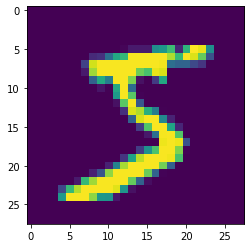

In [8]:
plt.imshow(x_train[0])
plt.show()

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Scaling Values 0-1
x_train = x_train/255
x_test = x_test/255

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
# In each image we have data of 28*28 pixels ie a matrix. So we have to flatten the image to a vector of 28*28 = 784 pixels.

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1368 - accuracy: 0.9593
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1021 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0834 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0693 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0605 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0518 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0462 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.035

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1014 - accuracy: 0.9717


In [15]:
print(loss, accuracy)

0.10136140882968903 0.9717000126838684


In [16]:
predictions = model.predict(x_test)

In [17]:
print(predictions[0])
print(np.argmax(predictions[0]))

[4.8464537e-03 7.5214565e-01 5.1690060e-01 7.6110607e-01 2.2272663e-05
 1.6215444e-04 4.0550272e-08 9.9999803e-01 2.6936799e-02 1.2149173e-01]
7


In [18]:
ypredLabels = [np.argmax(i) for i in predictions]
print(ypredLabels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [19]:
confusionMatrix = confusion_matrix(y_test, ypredLabels)
print(confusionMatrix)

tf.Tensor(
[[ 968    1    2    1    1    2    1    1    3    0]
 [   0 1123    0    2    0    3    2    0    5    0]
 [   5    1  995    3    7    3    2    6    9    1]
 [   0    0    4  967    0   23    0    4    4    8]
 [   1    0    1    1  965    0    4    1    1    8]
 [   2    0    0    5    1  876    3    1    2    2]
 [   4    3    0    0    4   10  933    0    4    0]
 [   2    6    7    5    2    0    0  993   10    3]
 [   4    0    1    5    5   12    1    4  942    0]
 [   3    4    0    4   14   12    1    5   12  954]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted')

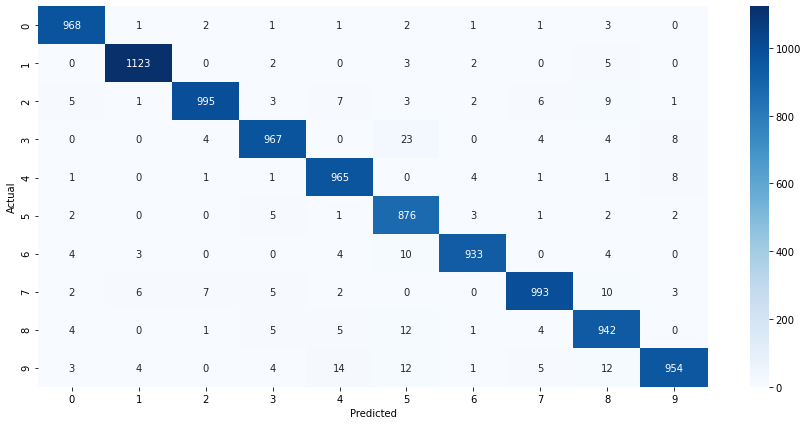

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [21]:
imagePath='InputImage.png'
img = cv2.imread(imagePath)

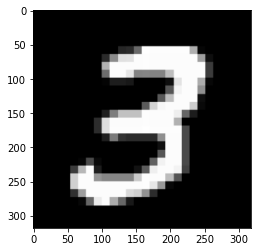

In [22]:
plt.imshow(img)
plt.show()

In [23]:
img.shape

(318, 318, 3)

In [24]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [25]:
img.shape

(318, 318)

In [26]:
img = cv2.resize(img, (28,28))

In [27]:
img.shape

(28, 28)

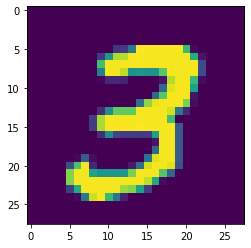

In [28]:
plt.imshow(img)

In [29]:
img = img/255

In [30]:
img = np.reshape(img, (1,28,28))

In [31]:
prediction = model.predict(img)

In [32]:
print(prediction)

[[2.2686392e-10 2.0802251e-01 2.7871132e-04 1.0000000e+00 2.3557695e-10
  8.5439324e-01 1.2621754e-13 2.2752285e-03 9.3738359e-01 2.9108384e-01]]


In [33]:
print(np.argmax(prediction))

3
